<a href="https://colab.research.google.com/github/bandhandut19/Thesisworkings/blob/main/Autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [5]:
a = torch.linspace(0., 3. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.3927, 0.7854, 1.1781, 1.5708, 1.9635, 2.3562, 2.7489, 3.1416,
        3.5343, 3.9270, 4.3197, 4.7124, 5.1051, 5.4978, 5.8905, 6.2832, 6.6759,
        7.0686, 7.4613, 7.8540, 8.2467, 8.6394, 9.0321, 9.4248],
       requires_grad=True)


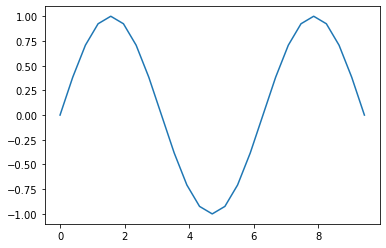

In [6]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [7]:
print(b)

tensor([ 0.0000e+00,  3.8268e-01,  7.0711e-01,  9.2388e-01,  1.0000e+00,
         9.2388e-01,  7.0711e-01,  3.8268e-01, -8.7423e-08, -3.8268e-01,
        -7.0711e-01, -9.2388e-01, -1.0000e+00, -9.2388e-01, -7.0711e-01,
        -3.8268e-01, -3.0199e-07,  3.8268e-01,  7.0711e-01,  9.2388e-01,
         1.0000e+00,  9.2388e-01,  7.0711e-01,  3.8268e-01, -2.3850e-08],
       grad_fn=<SinBackward0>)


In [8]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  7.6537e-01,  1.4142e+00,  1.8478e+00,  2.0000e+00,
         1.8478e+00,  1.4142e+00,  7.6537e-01, -1.7485e-07, -7.6537e-01,
        -1.4142e+00, -1.8478e+00, -2.0000e+00, -1.8478e+00, -1.4142e+00,
        -7.6537e-01, -6.0398e-07,  7.6537e-01,  1.4142e+00,  1.8478e+00,
         2.0000e+00,  1.8478e+00,  1.4142e+00,  7.6537e-01, -4.7700e-08],
       grad_fn=<MulBackward0>)
tensor([ 1.0000,  1.7654,  2.4142,  2.8478,  3.0000,  2.8478,  2.4142,  1.7654,
         1.0000,  0.2346, -0.4142, -0.8478, -1.0000, -0.8478, -0.4142,  0.2346,
         1.0000,  1.7654,  2.4142,  2.8478,  3.0000,  2.8478,  2.4142,  1.7654,
         1.0000], grad_fn=<AddBackward0>)


In [9]:
out = d.sum()
print(out)

tensor(35.0547, grad_fn=<SumBackward0>)


In [10]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x7fbb95355c10>, 0), (None, 0))
((<SinBackward0 object at 0x7fbb95355390>, 0), (None, 0))
((<AccumulateGrad object at 0x7fbb95355050>, 0),)
()

c:

b:

a:
None


tensor([ 2.0000e+00,  1.8478e+00,  1.4142e+00,  7.6537e-01, -8.7423e-08,
        -7.6537e-01, -1.4142e+00, -1.8478e+00, -2.0000e+00, -1.8478e+00,
        -1.4142e+00, -7.6537e-01,  2.3850e-08,  7.6537e-01,  1.4142e+00,
         1.8478e+00,  2.0000e+00,  1.8478e+00,  1.4142e+00,  7.6537e-01,
         2.7814e-07, -7.6537e-01, -1.4142e+00, -1.8478e+00, -2.0000e+00])


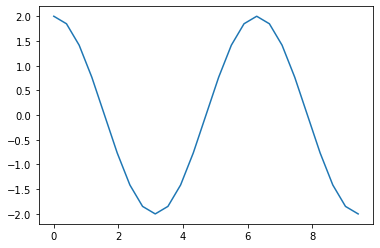

In [11]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

In [12]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()

In [13]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

In [14]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

tensor([ 0.0010,  0.0409, -0.0756,  0.0776, -0.0524,  0.0158,  0.0320, -0.0603,
         0.0831, -0.0455], grad_fn=<SliceBackward0>)
None


In [15]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(161.6317, grad_fn=<SumBackward0>)


In [16]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0010,  0.0409, -0.0756,  0.0776, -0.0524,  0.0158,  0.0320, -0.0603,
         0.0831, -0.0455], grad_fn=<SliceBackward0>)
tensor([ 1.4055, -5.2874, -0.9948,  5.2881, -4.7525,  0.1730, -0.8240, -8.1716,
        -0.6853, -2.1515])


In [17]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0004,  0.0462, -0.0746,  0.0724, -0.0477,  0.0157,  0.0329, -0.0521,
         0.0837, -0.0434], grad_fn=<SliceBackward0>)
tensor([ 1.4055, -5.2874, -0.9948,  5.2881, -4.7525,  0.1730, -0.8240, -8.1716,
        -0.6853, -2.1515])


In [18]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad()

print(model.layer2.weight.grad[0][0:10])

tensor([ 1.4055, -5.2874, -0.9948,  5.2881, -4.7525,  0.1730, -0.8240, -8.1716,
        -0.6853, -2.1515])
tensor([ 11.0560, -25.1254,  -8.7076,  23.2457,  -5.7640,   0.0317,  -3.2761,
        -18.6134,  -7.5534, -12.2330])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
